# Classification

**Classification** is a type of supervised learning where the goal is to predict the categorical label of an input data point. In classification tasks, the model learns from labeled data (i.e., data that already has the correct answers) to predict the class or category to which new, unseen data points belong.

---

## **Key Concepts**

- **Supervised Learning**: Classification is a type of supervised learning, meaning the model is trained on a dataset that includes both input features and their corresponding labels (target values).
  
- **Categorical Labels**: In classification, the target variable (the value you're trying to predict) is categorical. This means the output can take on a limited number of discrete values (e.g., 'cat', 'dog', 'fish').

- **Classes**: The different categories or labels a classification model predicts are referred to as **classes**. For example, in a binary classification problem, there are two classes (e.g., "positive" or "negative"). In multi-class classification, there are more than two classes.

---

## **Types of Classification**

1. **Binary Classification**:
   - Involves classifying data into two categories or classes. Examples include:
     - Predicting if an email is "spam" or "not spam".
     - Predicting whether a patient has a disease ("positive" or "negative").

2. **Multi-Class Classification**:
   - Involves classifying data into more than two classes. Examples include:
     - Predicting which category a news article belongs to (e.g., "sports", "politics", "technology").
     - Classifying different types of fruits (e.g., "apple", "orange", "banana").

3. **Multi-Label Classification**:
   - Involves assigning multiple labels to each input. This is different from traditional classification because each instance can belong to more than one class. Examples include:
     - Categorizing a movie with multiple genres (e.g., "comedy", "drama", "romance").
     - Tagging images with multiple objects (e.g., "dog", "tree", "car").

---

## **Common Classification Algorithms**

1. **Logistic Regression**: Despite the name, it is a classification algorithm that is used to model binary classification problems. It uses a logistic function to estimate probabilities.

2. **Decision Trees**: These models split the data into subsets based on the feature values, creating a tree-like structure that leads to class labels.

3. **Random Forest**: An ensemble of decision trees, it aggregates predictions from multiple trees to improve accuracy and reduce overfitting.

4. **K-Nearest Neighbors (KNN)**: A non-parametric algorithm that classifies new data points based on the majority class of the nearest neighbors in the training set.

5. **Support Vector Machines (SVM)**: A powerful classifier that tries to find the hyperplane that best separates different classes in the feature space.

6. **Naive Bayes**: A probabilistic classifier based on Bayes' Theorem that assumes independence between features. It works well for text classification tasks.

7. **Neural Networks**: Deep learning models that can classify data by learning complex patterns, often used for image, speech, and text classification.

---


## **Applications of Classification**

- **Spam Email Detection**: Classifying emails as spam or not spam.
- **Image Recognition**: Identifying objects or people in images.
- **Medical Diagnosis**: Classifying patients based on disease presence or absence (e.g., cancer detection).
- **Customer Segmentation**: Grouping customers based on purchasing behavior (e.g., "high-value", "low-value").
- **Sentiment Analysis**: Classifying the sentiment of text as positive, negative, or neutral (e.g., analyzing social media posts).

---



# Sigmoid Function

The **Sigmoid Function** is a mathematical function that produces an "S"-shaped curve and is commonly used in machine learning and statistics. It is widely used for binary classification tasks,  in logistic regression and neural networks, to map predicted values into probabilities between 0 and 1.

---

## **Mathematical Expression**

Where:
- \( x \) is the input to the function (which can be any real number).
- \( e \) is the base of the natural logarithm (approximately 2.71828).



<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/sigmoid-activation-function-1_0.png" width="300px">

In [3]:
import pandas as pd

df = pd.read_csv("D:\\utils\\DataSets\\car_ownership.csv")
df.head(3)

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
X= df.drop(columns=["owns_car"])
y= df["owns_car"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [19]:
model.score(X_test, y_test)

0.8235294117647058

In [20]:
X_test

,monthly_salary
8,62000
13,29000
9,61000
21,26000
0,22000
11,28000
16,25000
17,58000
12,27000
24,50000


In [21]:
#probabiluity of having and not having a car
model.predict_proba(X_test)

array([[0.06524297, 0.93475703],
       [0.88576427, 0.11423573],
       [0.07450722, 0.92549278],
       [0.92247078, 0.07752922],
       [0.95466811, 0.04533189],
       [0.89943159, 0.10056841],
       [0.93208322, 0.06791678],
       [0.10995349, 0.89004651],
       [0.91162687, 0.08837313],
       [0.27902321, 0.72097679],
       [0.93208322, 0.06791678],
       [0.40652254, 0.59347746],
       [0.14115375, 0.85884625],
       [0.37259555, 0.62740445],
       [0.1593594 , 0.8406406 ],
       [0.61729164, 0.38270836],
       [0.2253445 , 0.7746555 ]])

In [22]:
model.coef_, model.intercept_

(array([[0.00014274]]), array([-6.18758977]))

In [23]:
#see for 62000 both the probability is 94% which is same  these steps are shown to understand how above probability is calculated
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def prediction_function(salary,model):
    x = model.intercept_[0] + model.coef_[0][0]*salary
    return sigmoid(x)
62000
prediction_function(62000,model)   

0.9347570341678463

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
report = classification_report(y_test, y_pred)   
print(report)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.89      0.80      0.84        10

    accuracy                           0.82        17
   macro avg       0.82      0.83      0.82        17
weighted avg       0.83      0.82      0.82        17



In [26]:
report = classification_report([1,0,0,1,0,1,1], [0,1,0,0,0,1,1])   
print(report)

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.67      0.50      0.57         4

    accuracy                           0.57         7
   macro avg       0.58      0.58      0.57         7
weighted avg       0.60      0.57      0.57         7



# Multi Class Classification

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


In [41]:
df = load_iris(as_frame=True)
df =  df.frame
df['target_name'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

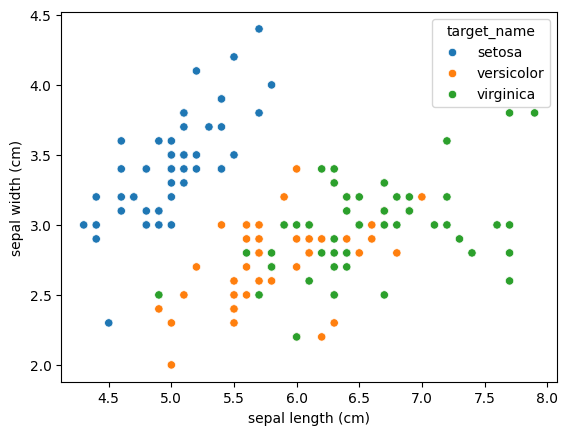

In [42]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="target_name")

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

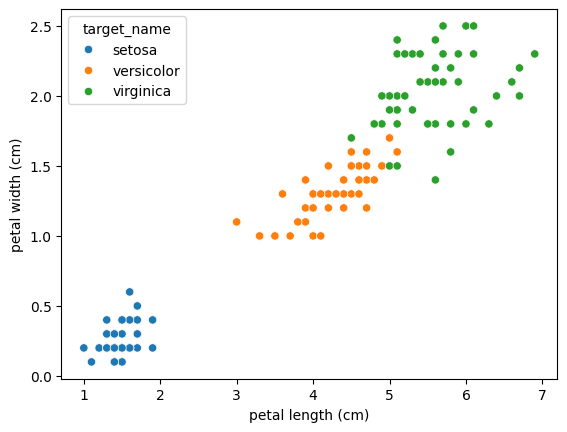

In [43]:
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="target_name")

In [73]:
X=df.drop(columns=["target","target_name"])
y=df["target"]
print(y.unique())

[0 1 2]


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)
model = LogisticRegression()   
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

In [80]:
model.score(X_test, y_test)


0.9333333333333333

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333333333333333

In [82]:
report = classification_report(y_test, y_pred)   
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.83      0.96      0.89        26
           2       0.96      0.83      0.89        30

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.94      0.93      0.93        90



<Axes: >

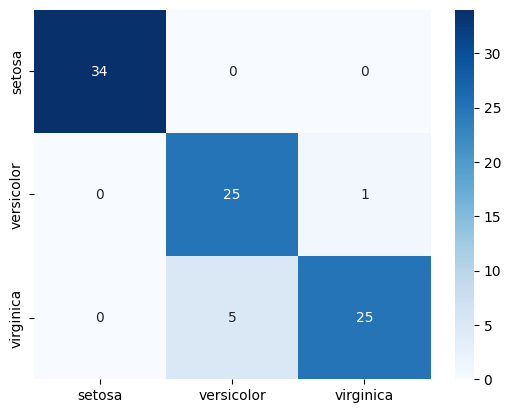

In [83]:
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])